# 판다스 (Pandas)

## Pandas 개요
- 데이터 분석과 관련된 다양한 기능을 제공하는 파이썬 패키지
    - 데이터 셋을 이용한 다양한 통계 처리 기능을 제공한다.
    - 표 형태의 데이터를 다루는데 특화된 파이썬 모듈.
        - 엑셀의 기능을 제공하는 파이썬 모듈이라고 생각하면 이해가 쉽다.
    - 표 형태의 데이터를 다루기 위한 **시리즈(Series)**와 **데이터프레임(DataFrame)** 클래스 제공
        - Series : 1차원 자료구조를 표현
        - DataFrame : 행렬의 표를 표현
- 설치
    - `pip install pandas`
    - `conda instll pandas`
    - 아나콘다에는 미리 install 되어 제공된다.
- https://pandas.pydata.org/
- https://pandas.pydata.org/docs/


In [ ]:
l = ['a', 'b', 'c', 'd']

# Series

## Series 개요
- 1차원 자료구조
- DataFrame(표)의 한 행이나 한 열을 표현한다.
- 각 원소는 index로 접근할 수 있다.
    - index는 순번과 지정한 이름 두가지로 구성된다.
        - index명을 명시적으로 지정하지 않으면 순번이 index명이 된다.
    - 순번은 0부터 1씩 증가하는 정수.  
- 벡터화 연산(element-wise 연산)을 지원
    - Series 객체에 연산을 하면 각각의 Series 원소들에 연산이 된다.
- Series를 구성하는 원소들을 다루는 다양한 메소드 제공    

## Series생성
- 구문
    - `Series(배열형태 자료구조)`
> #### 배열형태 자료구조    
> - 리스트
> - 튜플
> - 넘파이 배열(ndarray)

In [1]:
import pandas as pd

In [2]:

s1 = pd.Series([1,2,3,4,5])
print(type(s1))
print(s1)

<class 'pandas.core.series.Series'>
0    1
1    2
2    3
3    4
4    5
dtype: int64


```
index명   value
0         1   
1         2   
2         3
3         4
4         5
dtype: int64   series 원소들의 데이터타입 - int64 (정수: 64bit) - int8, int16, int32, int64
```

In [3]:
d = {
    '가':1, 
    '나':2,
    '다':3
}

s2 = pd.Series(d)
s2

가    1
나    2
다    3
dtype: int64

In [7]:
s2['나']

2

In [9]:
s2[1]

2

In [10]:
s2[-2]

2

In [7]:
s3 = pd.Series([80, 70, 90, 100], index=['국어', '영어', '과학', '수학'])  #index=[index명]
s3

국어     80
영어     70
과학     90
수학    100
dtype: int64

In [15]:
s3['영어'], s3[1], s3[-3]

(70, 70, 70)

In [5]:
s4 = pd.Series([350, 70], index=['총합계', '평균'])
s4

총합계    350
평균      70
dtype: int64

## Series안의 원소(element) 접근
### Indexing
- **index 순번으로 조회**
    - Series[순번]
    - Series.iloc[순번]
- **index 이름으로 조회**
    - Series[index명]
    - Series.loc[index명]
    - Series.index명
        - index명이 문자열일 경우 `. 표기법` 사용가능
    - index명이 문자열이면 문자열(" ") 로, 정수이면 정수로 호출
        - s['name'], s[2], s.loc['name'], s.loc[2]

- **팬시(fancy) 인덱싱**
    - Series[index리스트] 
    - 여러 원소 조회 시 조회할 index를 list로 전달
        - `s[[1,2,3]]`
    
### Slicing
- **Series[start index :  end index : step]**
    - start index 생략 : 0번 부터
    - end index
        - **index 순번일 경우는 포함 하지는다.**
        - **index 명의 경우는 포함한다.**
    - end index 생략 : 마지막 index까지
    - step 생략 : 1씩 증가
- **Slicing의 결과는 원본의 참조(View)를 반환**
    - slicing한 결과를 변경시 원본도 같이 바뀐다.
    - Series.copy() : Series를 복사한 새로운 객체 반환

In [8]:
# indexing
s3

국어     80
영어     70
과학     90
수학    100
dtype: int64

In [9]:
# index(순번) 으로 조회
print(s3[0], s3[1])  #양수 index
print(s3[-1], s3[-2])#음수 index

80 70
100 90


In [10]:
# iloc indexer
print(s3.iloc[0], s3.iloc[1])
print(s3.iloc[-1], s3.iloc[-2])

80 70
100 90


In [11]:
# index이름(명) 조회
print(s3['영어'], s3['수학'])
# loc indexer
print(s3.loc['국어'], s3.loc['과학'])
# . 표기법(dot notation)
print(s3.국어, s3.과학)

70 100
80 90
80 90


In [27]:
# 값 변경
s3['영어'] = 90
s3[0] = 100
s3

국어    100
영어     90
과학     90
수학    100
dtype: int64

In [12]:
# fancy indexing - 한번에 여러개의 원소(element)들을 조회. 
# 조회하려는 index들을 리스트로 묶어서 전달.
s3[[0, 1, 2]]

국어    80
영어    70
과학    90
dtype: int64

In [13]:
s3[['국어', '수학']]

국어     80
수학    100
dtype: int64

In [33]:
l = [1, 2, 3]
# l[[0,2]] #리스트, 튜플은 fancy indexing 기능이 없다.
print(l[0], l[2])

1 3


In [34]:
a = [0, 2]
s3[a]

국어    100
과학     90
dtype: int64

In [38]:
list('deacfkxrju')

['d', 'e', 'a', 'c', 'f', 'k', 'x', 'r', 'j', 'u']

In [14]:
# slicing
s4 = pd.Series(range(10), index=list('deacfkxrju'))  #index(순번): 0 ~ 9
s4

d    0
e    1
a    2
c    3
f    4
k    5
x    6
r    7
j    8
u    9
dtype: int64

In [40]:
s4[3:8:2]

c    3
k    5
r    7
dtype: int64

In [41]:
s4[3:8] #step: 1

c    3
f    4
k    5
x    6
r    7
dtype: int64

In [42]:
s4[3:] # 3 ~ 마지막

c    3
f    4
k    5
x    6
r    7
j    8
u    9
dtype: int64

In [44]:
s4[3::3]

c    3
x    6
u    9
dtype: int64

In [45]:
s4[:7]  #시작index 생략: 0

d    0
e    1
a    2
c    3
f    4
k    5
x    6
dtype: int64

In [48]:
s4[5:1:-1]

k    5
f    4
c    3
a    2
dtype: int64

In [49]:
s4[-2:3:-1]

j    8
r    7
x    6
k    5
f    4
dtype: int64

In [50]:
s4[::-1] #step: 음수 - 마지막 ~ 0 -1 

u    9
j    8
r    7
x    6
k    5
f    4
c    3
a    2
e    1
d    0
dtype: int64

In [52]:
s4[:]

d    0
e    1
a    2
c    3
f    4
k    5
x    6
r    7
j    8
u    9
dtype: int64

In [53]:
s4['e':'r']  #index명으로 slicing 할 때 end index도 포함해서 조회

e    1
a    2
c    3
f    4
k    5
x    6
r    7
dtype: int64

In [55]:
s4['r':'e':-2]

r    7
k    5
c    3
e    1
dtype: int64

#### Series/DataFrame - index 명은 중복될 수 있다.

In [57]:
s5 = pd.Series(range(10), index=list('AAABBBCCCC'))
s5

A    0
A    1
A    2
B    3
B    4
B    5
C    6
C    7
C    8
C    9
dtype: int64

In [58]:
s5[0]

0

In [59]:
s5['A']

A    0
A    1
A    2
dtype: int64

In [60]:
s5['A':'B'] 
#index명 중복된 경우
# 첫번째 start index명  ~  마지막 end index명

A    0
A    1
A    2
B    3
B    4
B    5
dtype: int64

In [61]:
s1

0    1
1    2
2    3
3    4
4    5
dtype: int64

### Indexing, Slicing을 이용한 값 변경

In [30]:
l = list(range(10))
l2 = l[:3]

In [32]:
l

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [33]:
l2[0] = 200
l2

[200, 1, 2]

In [34]:
l

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

>  ## shallow copy와 deep copy
> - ### deep copy(깊은 복사)
    - 원본의 카피본을 반환하여 값 변경시 원본이 변경되지 않는다.
    - 파이썬 리스트는 slicing시 deep copy
    - indexing은 deep copy
> - ### shallow copy(얕은 복사)
    - 원본을 반환하여 값 변경시 원본에 영향을 준다.
    - Series, DataFrame, 넘파이 배열(ndarray)은 slicing 조회시 shallow copy
> - ### copy() 메소드
    - Series, DataFrame, ndarray를 복사하여 반환한다.

In [15]:
import pandas as pd

s1 = pd.Series(range(10,101,10))
s1

0     10
1     20
2     30
3     40
4     50
5     60
6     70
7     80
8     90
9    100
dtype: int64

In [16]:
# indexing 을 이용해서 값을 변경 - 특정 index 값을 변경
s1[0] = 1000
s1

0    1000
1      20
2      30
3      40
4      50
5      60
6      70
7      80
8      90
9     100
dtype: int64

In [17]:
# pandas 에서 결측치값(수집이 안된값, 모르는 값, 없는 값) ==> NA(Not Available), N/A, NaN (Not A Number)
#  1. None,  2. numpy의 nan 변수를 이용
#  결측치를 가지면 type이 float이 된다.
s1[2] = None
import numpy as np
s1[5] = np.nan
s1

0    1000.0
1      20.0
2       NaN
3      40.0
4      50.0
5       NaN
6      70.0
7      80.0
8      90.0
9     100.0
dtype: float64

In [19]:
# 여러 index에 값들을 한번에 변경 => fancy indexing
#  같은 값으로 변경
s1[[0, 3, 6]] = 3200
s1

0    3200.0
1      20.0
2       NaN
3    3200.0
4      50.0
5       NaN
6    3200.0
7      80.0
8      90.0
9     100.0
dtype: float64

In [20]:
# 각각 다른 값으로 변경
s1[[1, 4, 7, 8]] = 1000,4000,7000,8000 # 튜플대입(리스트대입도 가능)
s1

0    3200.0
1    1000.0
2       NaN
3    3200.0
4    4000.0
5       NaN
6    3200.0
7    7000.0
8    8000.0
9     100.0
dtype: float64

In [21]:
# slicing을 이용해 값 변경
# 같은 값으로 변경
s1[:4] = 1234  # 0 ~ 3
s1

0    1234.0
1    1234.0
2    1234.0
3    1234.0
4    4000.0
5       NaN
6    3200.0
7    7000.0
8    8000.0
9     100.0
dtype: float64

In [22]:
s1[::3] = 98765
s1

0    98765.0
1     1234.0
2     1234.0
3    98765.0
4     4000.0
5        NaN
6    98765.0
7     7000.0
8     8000.0
9    98765.0
dtype: float64

**slicing 한 결과의 원소를 변경하면 원본도 같이 바뀐다.**   
sliciing 결과는 shallow copy 이기 때문임.

In [23]:
s2 = pd.Series(range(10))
s2

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64

In [25]:
s100 = s2[2:8]
s100

2    2
3    3
4    4
5    5
6    6
7    7
dtype: int64

In [26]:
s100[3] = 10000
s100

2        2
3    10000
4        4
5        5
6        6
7        7
dtype: int64

In [27]:
s2

0        0
1        1
2        2
3    10000
4        4
5        5
6        6
7        7
8        8
9        9
dtype: int64

In [36]:
s200 = s2[2:8].copy()  #series/dataframe 객체.copy() : deep copy 
s200

2        2
3    10000
4        4
5        5
6        6
7        7
dtype: int64

In [37]:
s200[3] = 3  #Deep copy이므로 원본은 변경되지 않는다.
s200

2    2
3    3
4    4
5    5
6    6
7    7
dtype: int64

In [39]:
s2

0        0
1        1
2        2
3    10000
4        4
5        5
6        6
7        7
8        8
9        9
dtype: int64

slicing을 이용해 단순 조회만 하거나 변경을 하더라도 원본이 같이 바뀌어도 상관없는 경우는 그냥 slicing 을 하고  
원본이 변경되어선 안되는 경우 copy()를 이용해 깊은복사(deep copy)를 한다.

In [47]:
s200.iloc[1]

3

## Boolean 인덱싱 (Masking)
- Series 의 indexing 연산자에 boolean 리스트를 넣으면 True인 index의 값들만 조회한다. 
    - Boolean 연산자들을 이용해 원하는 조건의 값들을 조회할 수 있다
    - 다중 조건인 경우 반드시 ( )로 조건을 묶어야 한다.
    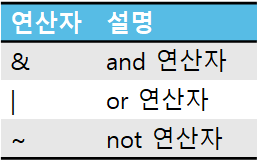 
    
    - 파이썬과는 다르게 `and`, `or` 예약어는 사용할 수 없다.

In [49]:
s3 = pd.Series([70, 20, 100, 200, 50])
bool_index = [True, True, False, False, True] #bool값을 원소로 가지며 s3와 크기가 같은 list
s3[bool_index]  #True 와 같은 index의 값들이 조회
# sql의 where 절 역할.

0    70
1    20
4    50
dtype: int64

In [ ]:
# element-wise 연산 (Vectorization-벡터화)
# Series 연산자 상수 => Series의 각각의 원소들과 상수를 연산

In [52]:
s3

0     70
1     20
2    100
3    200
4     50
dtype: int64

In [60]:
# s3에서 100 이상인 값들만 조회
# s3[[False, False, True, True, False]]

s3[s3 >= 100]

2    100
3    200
dtype: int64

In [64]:
# s3에서 50 ~ 150 사이의 값들만 조회.  and 는 사용 못함. &  사용하고 피연산자를 ( )로 묶는다.
s3[(s3>=50)  & (s3<=150)]

0     70
2    100
4     50
dtype: int64

In [66]:
# s3에서 50 미만, 150 이상인 값들만 조회
s3[(s3<50) | (s3>=150)]

1     20
3    200
dtype: int64

In [68]:
# 100 이상이 아닌 값들을 조회
s3[~(s3 >= 100)]

0    70
1    20
4    50
dtype: int64

## 주요 메소드, 속성
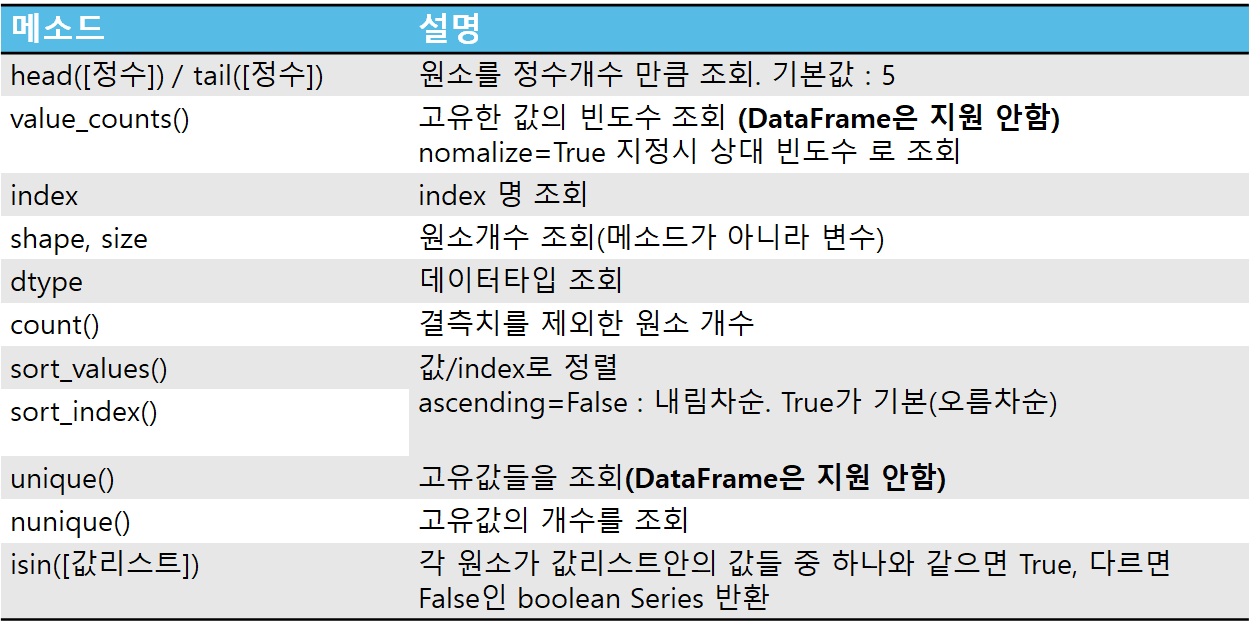

In [70]:
s1 = pd.Series(range(0, 100, 10))
s1

0     0
1    10
2    20
3    30
4    40
5    50
6    60
7    70
8    80
9    90
dtype: int64

In [73]:
# head(), tail() - 앞뒤의 일부 데이터만 조회
s1.head() # 앞의 5개 원소
s1.head(2)# 개수를 명시

0     0
1    10
dtype: int64

In [74]:
s1.tail() #뒤의 5개 원소
s1.tail(7)

3    30
4    40
5    50
6    60
7    70
8    80
9    90
dtype: int64

In [75]:
s2 = pd.Series(['A', 'A', 'AB', 'O', 'B', 'O', 'AB', 'B', 'O', 'O', 'A']) # 범주형 - 정해진 범위의 값들로 구성된 타입 => 분류시 사용.
s2

0      A
1      A
2     AB
3      O
4      B
5      O
6     AB
7      B
8      O
9      O
10     A
dtype: object

In [77]:
r = s2.value_counts() #각각의 범주값들이 몇개씩 있는지 조회(*****)
r

O     4
A     3
AB    2
B     2
dtype: int64

In [79]:
r['A'], r['AB']

(3, 2)

In [80]:
s2.value_counts(normalize=True) # 비율

O     0.363636
A     0.272727
AB    0.181818
B     0.181818
dtype: float64

In [82]:
print(s2.shape) # *****  차원별(순서의 방향-축(axis))로 원소가 몇개씩 구성되었는지 반환(튜플)
print(s2.size)  # 전체 원소의 개수

(11,)
11


In [83]:
s2.unique() #범주형 변수를 구성하는 고유값들을 반환

array(['A', 'AB', 'O', 'B'], dtype=object)

In [84]:
s2.nunique()# 고유값의 개수

4

In [85]:
s2.isin(['A', 'AB'])  # [ ]의 값인 INDEX는 True, 아니면 False를 반환.

0      True
1      True
2      True
3     False
4     False
5     False
6      True
7     False
8     False
9     False
10     True
dtype: bool

In [87]:
s2[s2.isin(['A', 'AB'])]

0      A
1      A
2     AB
6     AB
10     A
dtype: object

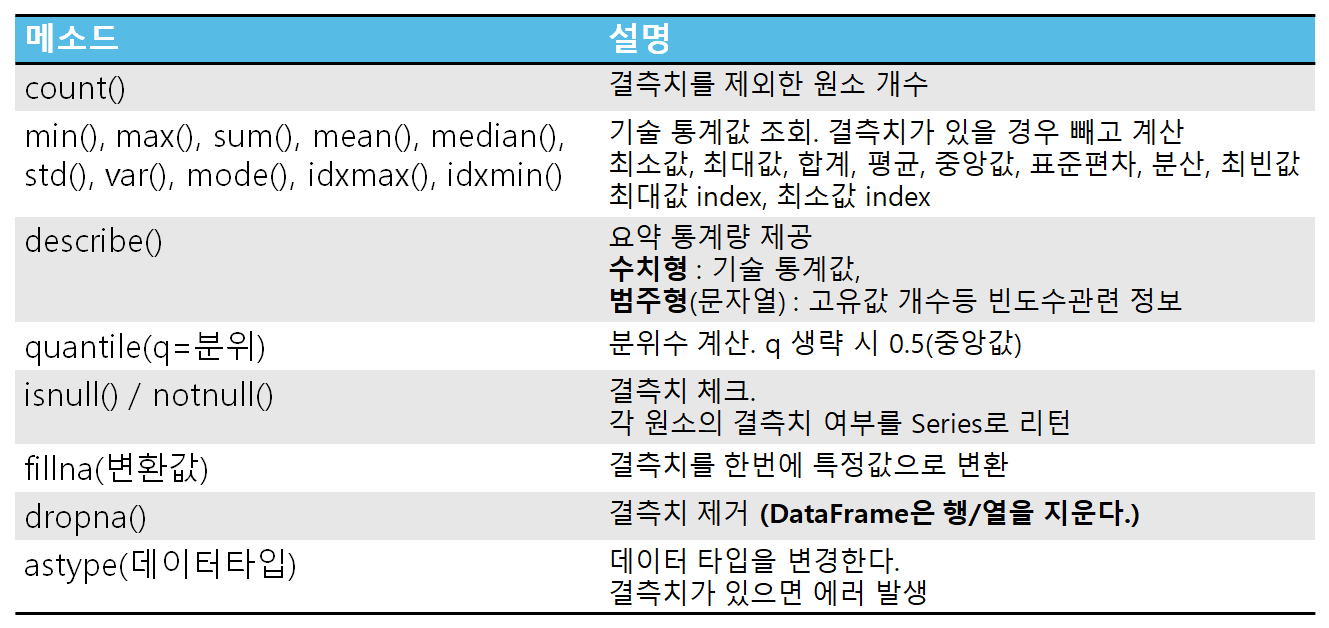

In [89]:
(30+40+70+10+10000000000)/5

2000000030.0

## 기술 통계량
- 데이터셋의 데이터들의 특징을 하나의 숫자로 요약한 것.
- ### 평균 
    - 전체 데이터들의 합계를 총 개수로 나눈 통계량
    - 전체 데이터셋의 데이터들은 평균값 근처에 분포되어 데이터셋의 대표값으로 사용한다.
    - 이상치(너무 크거나 작은 값)의 영향을 많이 받는다.


$$평균 = \cfrac{1}{n}\sum_{i=1}^{n}{X_i}$$
- ### 중앙값
    - 분포된 값들을 작은값 부터 순서대로 나열한 뒤 그 중앙에 위치한 값
    - 이상치에 영향을 받지 않아 평균대신 집단의 대표값으로 사용한다.
- ### 표준편차/분산
    - 값들이 흩어져있는 상태(분포)를 추정하는 통계량으로 분포된 값들이 평균에서 부터 얼마나 떨어져 있는지를 나타내는 통계량.
    - 각 데이터가 평균으로 부터 얼마나 차이가 있는지를 편차(Deviation)라고 한다. ($평균-데이터$)
    - 분산 : 편차 제곱의 합을 총 개수로 나눈 값 
    $$분산 = \cfrac{1}{n}\sum_{i=1}^{n}(평균-X_i)^2$$
    - 표준편차
        - 분산의 제곱근
        - 분산은 원래 값에 제곱을 했으므로 다시 원래 단위로 계산한 값.
    $$표준편차 = \sqrt{\cfrac{1}{n}\sum_{i=1}^{n}(평균-X_i)^2}$$

- ### 최빈값(mode)
    - 데이터 셋에서 가장 많이 있는 값.
- ### 분위수(Quantile)
    - 데이터의 크기 순서에 따른 위치값
        - 데이터셋을 크기순으로 정렬한뒤 N등분했을 때 특정 위치에서의 값 (단면)
        - N등분한 특정위치의 값들 통해 전체 데이터셋을 분포를 파악한다.
        - 대표적인 분위수 : 4분위, 10분위, 100분위
    - 데이터의 분포를 파악할 때 사용
    - 이상치 중 극단값들을 찾을 때 사용 (4분위수)
<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile4.uf.tistory.com%2Fimage%2F99BCE04D5DF076AB2FA02D'>
<img src='https://t1.daumcdn.net/cfile/tistory/99E6BD465DF0782433'>

In [90]:
s4 = pd.Series([10,5,7,10,20,30,13,21,10000,7,14])
s4

0        10
1         5
2         7
3        10
4        20
5        30
6        13
7        21
8     10000
9         7
10       14
dtype: int64

In [91]:
# 평균
s4.mean()

921.5454545454545

In [92]:
s5 = pd.Series([10,5,7,10,20,30,13,21,7,14])
s5.mean()

13.7

In [93]:
s4.median() #중앙값

13.0

In [94]:
s4.sort_values()

1         5
2         7
9         7
0        10
3        10
6        13
10       14
4        20
7        21
5        30
8     10000
dtype: int64

In [95]:
s5.median()

11.5

In [96]:
# 평균과 중앙값을 조회 - 값의 차이가 많이 나면 극단적으로 크거나 작은 값이 있다는 의미.
s4.mean(), s4.median()

(921.5454545454545, 13.0)

In [97]:
s5.mean(), s5.median()

(13.7, 11.5)

In [99]:
# 분산
print(s4.var(), s5.var())

9066072.272727273 61.34444444444445


In [100]:
# 표준편차
print(s4.std(), s5.std())

3010.991908445998 7.832269431297958


In [102]:
import math
math.sqrt(s4.var()), math.sqrt(s5.var())

(3010.991908445998, 7.832269431297958)

In [105]:
s6 =  pd.Series(['A', 'A', 'AB', 'O', 'B', 'O', 'AB', 'B', 'O', 'O', 'A', 'A']) 
# 최빈값 - 빈도수가 가장 많은 원소(값)
s6.mode() # Series

0    A
1    O
dtype: object

In [106]:
s6.value_counts()

A     4
O     4
AB    2
B     2
dtype: int64

In [109]:
s4#.mode()

0        10
1         5
2         7
3        10
4        20
5        30
6        13
7        21
8     10000
9         7
10       14
dtype: int64

In [111]:
# 분위수 계산 (연속형 타입-값이 실수(정수)로 구성된 변수-의 변수에 사용) - quantile() 메소드 사용
s4.quantile() # default: 중앙값

13.0

In [112]:
s5.quantile(q=[0.1])  # 10분위에서 1분위수
# q: 분위의 비율값을 0  ~  1사이 실수로 설정.

0.1    6.8
dtype: float64

In [115]:
# 4분위 - 0.25, 0.5, 0.75
s5.quantile(q=[0.25, 0.5, 0.75])

0.25     7.75
0.50    11.50
0.75    18.50
dtype: float64

In [116]:
s5.quantile(q=[0.5])

0.5    11.5
dtype: float64

In [117]:
s5.quantile() #default q=[0.5] ==> 중앙값

11.5

In [125]:
import numpy as np
np.arange(0.1,1,0.1)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [121]:
[x/10 for x in range(1,10)]

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [126]:
# 10분위
s5.quantile(q=[x/10 for x in range(1,10)])

0.1     6.8
0.2     7.0
0.3     9.1
0.4    10.0
0.5    11.5
0.6    13.4
0.7    15.8
0.8    20.2
0.9    21.9
dtype: float64

In [131]:
# 최대값/최소값
print(s4.max(), s4.min())

10000 5


In [132]:
s4

0        10
1         5
2         7
3        10
4        20
5        30
6        13
7        21
8     10000
9         7
10       14
dtype: int64

In [133]:
# 최대값/최소값이 있는 index를 반환.
print(s4.idxmax(), s4.idxmin())

8 1


In [134]:
# 합계
s4.sum()

10137

In [135]:
 # describe() 여러 기술통계량을 묶어서 반환.
# 숫자(정수,실수) 타입의 원소를 가진 Series
s4.describe() 

count       11.000000
mean       921.545455
std       3010.991908
min          5.000000
25%          8.500000
50%         13.000000
75%         20.500000
max      10000.000000
dtype: float64

In [138]:
# 범주형(문자열 타입-object)의 원소를 가진 Series
s6.describe()

count     12
unique     4
top        A
freq       4
dtype: object

In [139]:
s6.value_counts()

A     4
O     4
AB    2
B     2
dtype: int64

In [142]:
s5[:3] = None
s5

0     NaN
1     NaN
2     NaN
3    10.0
4    20.0
5    30.0
6    13.0
7    21.0
8     7.0
9    14.0
dtype: float64

In [148]:
#Pandas의 기술통계함수는 NaN(결측치)는 제외하고 계산한다.
print(s5.size, s5.count()) # size: 총 원소개수(결측치 상관없이), count(): NaN이 아닌 원소들의 개수
print(s5.sum())
print(s5.min(), s5.max())
print(s5.mean())

10 7
115.0
7.0 30.0
16.428571428571427


In [150]:
s5.sum()/7

16.428571428571427

## 결측치 (Missing Value, Not Available)
- 판다스에서 결측치
    - None, numpy.nan, numpy.NAN
    
### 결측치 확인
- Numpy
    - np.isnan(배열)
    ```python
import numpy as np
a = np.array([1,np.nan])
np.isnan(a)
```
- Series
    - Series객체.isnull(), .isna(): 결측치: True, 결측치아닌값: False
    - Series.notnull(), .notna()   : 결측치: False, 결측치아닌값: True
- DataFrame
    - DataFrame객체.isnull(), DataFrame객체.isna()
    - DataFrame객체.notnull(), DataFrame객체.notna()

In [151]:
import numpy as np
import pandas as pd

s1 = pd.Series([10, 5, 30, None, 100, np.nan, 120, 90, np.NAN])
s1

0     10.0
1      5.0
2     30.0
3      NaN
4    100.0
5      NaN
6    120.0
7     90.0
8      NaN
dtype: float64

In [152]:
# 결측치 확인
# numpy 함수
np.isnan(s1) #False: 값, True: 결측치 => 원소별로 체크

0    False
1    False
2    False
3     True
4    False
5     True
6    False
7    False
8     True
dtype: bool

In [153]:
# Series함수
s1.isnull()

0    False
1    False
2    False
3     True
4    False
5     True
6    False
7    False
8     True
dtype: bool

In [154]:
s1.isna()

0    False
1    False
2    False
3     True
4    False
5     True
6    False
7    False
8     True
dtype: bool

In [155]:
s1.notnull()

0     True
1     True
2     True
3    False
4     True
5    False
6     True
7     True
8    False
dtype: bool

In [156]:
s1.notna()

0     True
1     True
2     True
3    False
4     True
5    False
6     True
7     True
8    False
dtype: bool

In [159]:
# 결측치 개수 확인.
s1.isnull().sum()
# bool 값을 가진 Series.sum() => True의 개수
# sum() 계산-True: 1, False: 0 해서 계산

3

In [160]:
s1.notnull().sum() #NA가 아닌 값의 개수

6

In [161]:
s1.count()

6

### 결측치 처리
- 제거 
    - dropna()
- 다른값으로 대체 
    - fillna()    

Pandas 의 Series나 DataFrame의 원소를 변경(추가,수정,삭제) 하는 함수나 메소드 대부분은 원본을 변경하지 않고 변경된 결과를 새로운 객체에 담아 반환한다.  ==> 원본을 변경하려는 경우 **inplace=True**  argument를 설정한다.

In [165]:
# 3, 5, 8 index
s2 = s1.dropna() #
s2

0     10.0
1      5.0
2     30.0
4    100.0
6    120.0
7     90.0
dtype: float64

In [167]:
s_copy = s1.copy()
s_copy

0     10.0
1      5.0
2     30.0
3      NaN
4    100.0
5      NaN
6    120.0
7     90.0
8      NaN
dtype: float64

In [170]:
s_copy.dropna(inplace=True)

In [171]:
s_copy

0     10.0
1      5.0
2     30.0
4    100.0
6    120.0
7     90.0
dtype: float64

In [173]:
s_copy.dropna?

In [175]:
# 다른값으로 대체
s_copy2 = s1.copy()
s_copy2

0     10.0
1      5.0
2     30.0
3      NaN
4    100.0
5      NaN
6    120.0
7     90.0
8      NaN
dtype: float64

In [176]:
s_copy2.fillna(0) #NA를 0으로 대체

0     10.0
1      5.0
2     30.0
3      0.0
4    100.0
5      0.0
6    120.0
7     90.0
8      0.0
dtype: float64

In [179]:
# 연속형(실수) 경우에는 평균이나 중앙값으로 대체한다.
s_copy2.fillna(round(s_copy2.mean(),2))  #평균으로 대체

0     10.00
1      5.00
2     30.00
3     59.17
4    100.00
5     59.17
6    120.00
7     90.00
8     59.17
dtype: float64

In [182]:
s_copy2.fillna(s_copy2.median(), inplace=True) # 중앙값으로 대체 (inplace=True: 원본을 변경)

In [196]:
s1

0     10.0
1      5.0
2     30.0
3      NaN
4    100.0
5      NaN
6    120.0
7     90.0
8      NaN
dtype: float64

In [195]:
s_copy2

0     10.0
1      5.0
2     30.0
3     60.0
4    100.0
5     60.0
6    120.0
7     90.0
8     60.0
dtype: float64

In [189]:
s6[[0,5]] = np.nan
s6.isna().sum()

2

In [194]:
# 범주형 - 최빈값으로 대체
s6.fillna(s6.mode()[0])

0      A
1      A
2     AB
3      O
4      B
5      A
6     AB
7      B
8      O
9      O
10     A
11     A
dtype: object

### 정렬
- Series.sort_index()
    - index 명을 기준으로 정렬
- Series.sort_values()
    - 값을 기준으로 정렬
- 공통매개변수    
    - ascending=True: True(기본값)-오름차순, False-내림차순
    - inplace=False: True: 원본을 정렬, False(기본값): 정렬결과를 새로운 Series에 담아서 반환.

In [198]:
s2 = pd.Series([10, 5, 22, 100, 4, 7, 90, 23], index=list('eakrschq'))
s2

e     10
a      5
k     22
r    100
s      4
c      7
h     90
q     23
dtype: int64

In [199]:
s2.sort_index()

a      5
c      7
e     10
h     90
k     22
q     23
r    100
s      4
dtype: int64

In [202]:
s2.sort_index(ascending=False)

s      4
r    100
q     23
k     22
h     90
e     10
c      7
a      5
dtype: int64

In [204]:
s2.sort_values()

s      4
a      5
c      7
e     10
k     22
q     23
h     90
r    100
dtype: int64

In [205]:
s2.sort_values(ascending=False)

r    100
h     90
q     23
k     22
e     10
c      7
a      5
s      4
dtype: int64

In [208]:
s2.sort_values(inplace=True)

In [209]:
s2

s      4
a      5
c      7
e     10
k     22
q     23
h     90
r    100
dtype: int64

In [211]:
s1.sort_values()

1      5.0
0     10.0
2     30.0
7     90.0
4    100.0
6    120.0
3      NaN
5      NaN
8      NaN
dtype: float64

In [212]:
s1.sort_values(ascending=True)

1      5.0
0     10.0
2     30.0
7     90.0
4    100.0
6    120.0
3      NaN
5      NaN
8      NaN
dtype: float64

## 벡터화 (연산)
- Elements-wise 연산
- Numpy 배열(ndarray)과 마찬가지로 Series 객체과 연산을 하면 Series 내의 원소 별 연산을 한다.

In [216]:
s2

s      4
a      5
c      7
e     10
k     22
q     23
h     90
r    100
dtype: int64

In [215]:
# Series와 상수 간의 연산
s2 + 10

s     14
a     15
c     17
e     20
k     32
q     33
h    100
r    110
dtype: int64

In [217]:
s2 > 5

s    False
a    False
c     True
e     True
k     True
q     True
h     True
r     True
dtype: bool

In [219]:
s1 + 10

0     20.0
1     15.0
2     40.0
3      NaN
4    110.0
5      NaN
6    130.0
7    100.0
8      NaN
dtype: float64

In [222]:
s1 < 50  # NA 비교연산시 False를 반환

0     True
1     True
2     True
3    False
4    False
5    False
6    False
7    False
8    False
dtype: bool

In [224]:
# Series 간의 연산
# 같은 **index명** 끼리 연산
s10 = pd.Series([1,2,3])
s20 = pd.Series([10,20,30])
s30 = pd.Series([100,200,300], index=['가', '나', '다'])
s40 = pd.Series([1,2,3,4,5])

In [225]:
print(s10)
print('-------')
print(s20) # s10, s20 같은 index명

0    1
1    2
2    3
dtype: int64
-------
0    10
1    20
2    30
dtype: int64


In [226]:
s10 + s20

0    11
1    22
2    33
dtype: int64

In [227]:
s20 > s10
# s20[0] > s10[0]
# s20[1] > s10[1]
# s20[2] > s10[2]

0    True
1    True
2    True
dtype: bool

In [229]:
print(s10)
print('--------')
print(s30)
# index명이 다름

0    1
1    2
2    3
dtype: int64
--------
가    100
나    200
다    300
dtype: int64


In [230]:
s10 + s30

0   NaN
1   NaN
2   NaN
가   NaN
나   NaN
다   NaN
dtype: float64

In [233]:
# s10 > s30

In [234]:
s40

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [236]:
s10 + s40  #index명이 같은 것까지만 계산

0    2.0
1    4.0
2    6.0
3    NaN
4    NaN
dtype: float64

In [238]:
# s10 > s40 # 비교연산 - index명과 원소의 개수가 동일한 것끼리만 가능.